# Artificial Neural Network

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# Importing the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#See borders in sns
plt.rcParams["patch.force_edgecolor"] = True
sns.set_style('white')


# EDA

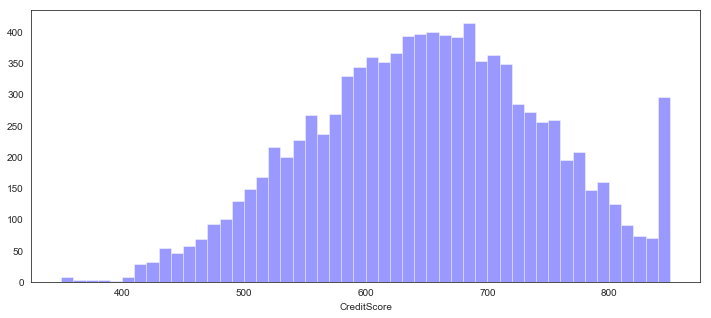

In [4]:
plt.figure(figsize=(12,5))
sns.distplot(df['CreditScore'], kde=False, bins=50, color='blue')

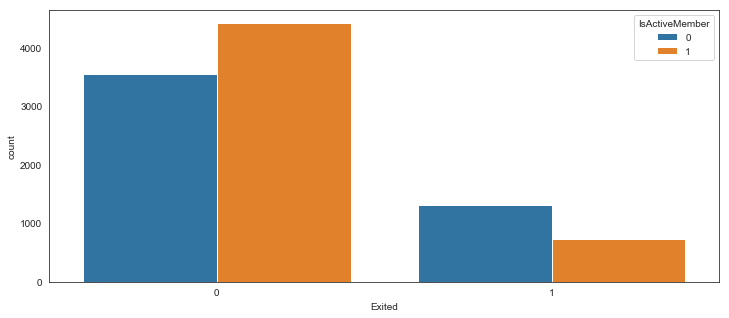

In [26]:
plt.figure(figsize=(12,5))

sns.countplot(df['Exited'], hue=df['IsActiveMember'])

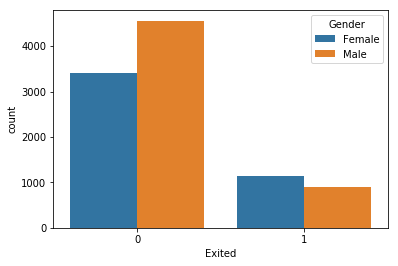

In [29]:
sns.countplot(df['Exited'], hue=df['Gender'])

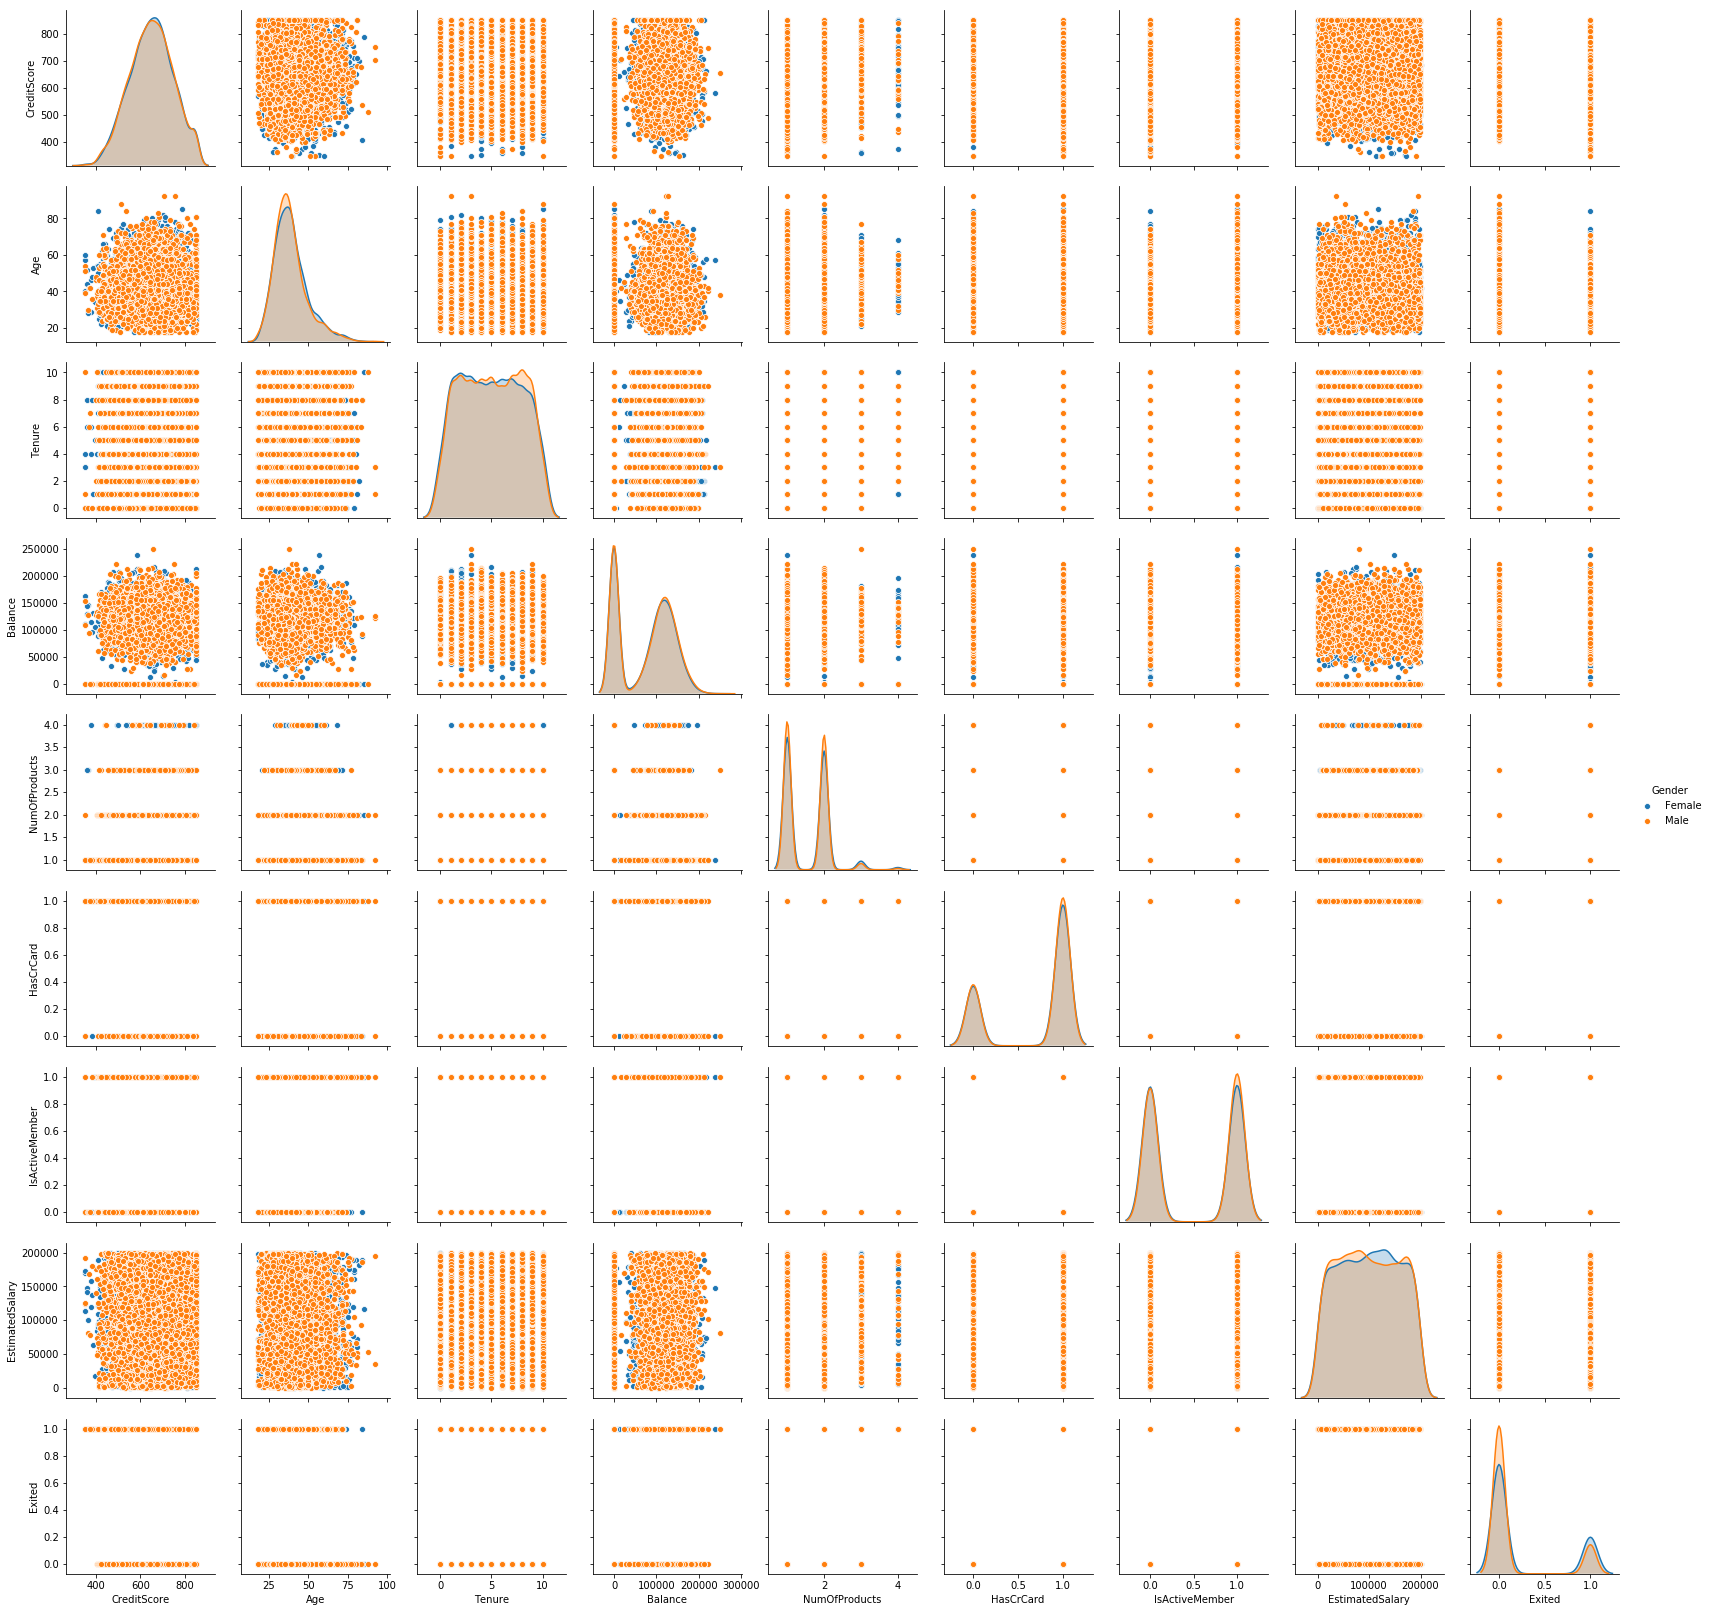

In [30]:
sns.pairplot(df.iloc[:,3:],hue='Gender')

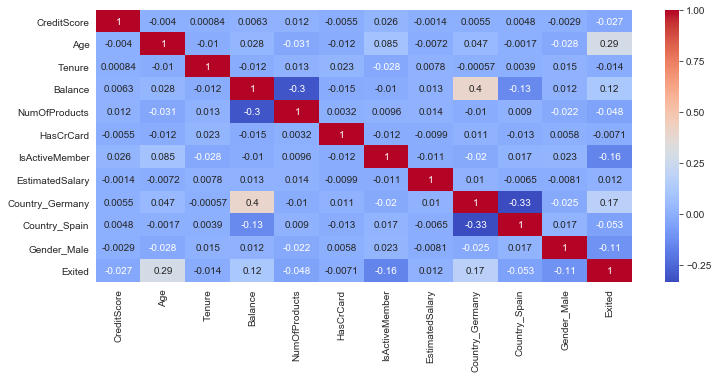

In [57]:
plt.figure(figsize=(12,5))
sns.heatmap(df.iloc[:,3:].corr(), cmap='coolwarm', annot=True)

<Figure size 864x360 with 0 Axes>

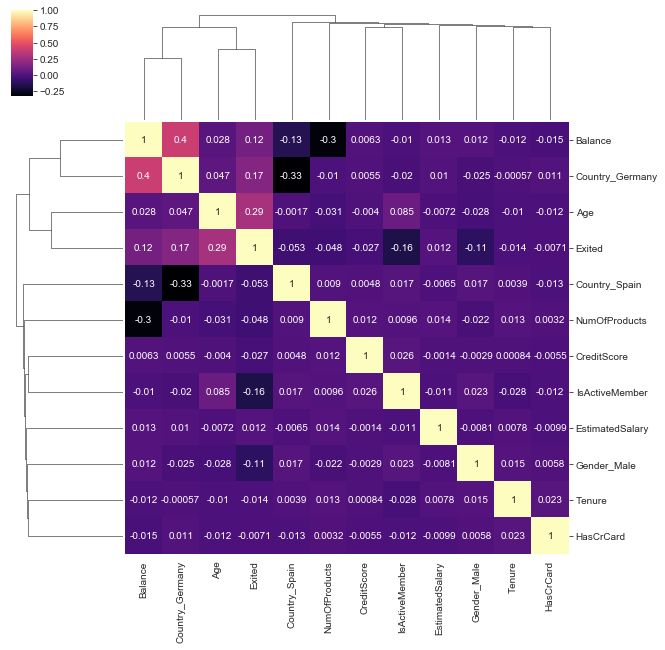

In [58]:
plt.figure(figsize=(12,5))
sns.clustermap(df.iloc[:,3:].corr(), cmap='magma', annot=True)

In [5]:
geography= pd.get_dummies(df['Geography'],prefix='Country', drop_first=True )
gender= pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)


In [6]:
df.drop(['Geography','Gender'], axis=1, inplace=True)


In [7]:
df=pd.concat([df,geography,gender], axis=1)

In [8]:
#Move the Exited to Last column
Exited = df['Exited']
df.drop(['Exited'], axis=1, inplace=True)

In [9]:
df['Exited']=Exited

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Country_Germany    10000 non-null uint8
Country_Spain      10000 non-null uint8
Gender_Male        10000 non-null uint8
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(1), uint8(3)
memory usage: 966.9+ KB


In [10]:
X= df.iloc[:, 3:14].values
y= df.iloc[:, 14].values

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create ANN Model

In [13]:
import keras

Using TensorFlow backend.


## Initialize ANN

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
model= Sequential()

In [16]:
#Add first hidden layers
model.add(Dense(units=6, activation='relu', input_dim=11, kernel_initializer='random_uniform'))

In [17]:
#Add second hidden layer
model.add(Dense(units=6, activation='relu', kernel_initializer='random_uniform'))

In [18]:
#Add output layer
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='random_uniform'))

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
#Fit model to training set 
model.fit(x=X_train, y=y_train, batch_size=10, epochs=100)

Epoch 1/100
7000/7000 [==============================] - 1s 193us/step - loss: 0.4901 - acc: 0.7960
Epoch 2/100
7000/7000 [==============================] - 1s 111us/step - loss: 0.4277 - acc: 0.7977
Epoch 3/100
7000/7000 [==============================] - 1s 116us/step - loss: 0.4233 - acc: 0.7977
Epoch 4/100
7000/7000 [==============================] - 1s 106us/step - loss: 0.4195 - acc: 0.8066
Epoch 5/100
7000/7000 [==============================] - 1s 107us/step - loss: 0.4169 - acc: 0.8244
Epoch 6/100
7000/7000 [==============================] - 1s 107us/step - loss: 0.4152 - acc: 0.8280
Epoch 7/100
7000/7000 [==============================] - 1s 112us/step - loss: 0.4138 - acc: 0.8303
Epoch 8/100
7000/7000 [==============================] - 1s 105us/step - loss: 0.4124 - acc: 0.8319
Epoch 9/100
7000/7000 [==============================] - 1s 105us/step - loss: 0.4109 - acc: 0.8327
Epoch 10/100
7000/7000 [==============================] - 1s 104us/step - loss: 0.4101 - acc: 0.8337

7000/7000 [==============================] - 1s 119us/step - loss: 0.3992 - acc: 0.8331
Epoch 82/100
7000/7000 [==============================] - 1s 119us/step - loss: 0.3990 - acc: 0.8350
Epoch 83/100
7000/7000 [==============================] - 1s 122us/step - loss: 0.3982 - acc: 0.8349
Epoch 84/100
7000/7000 [==============================] - 1s 108us/step - loss: 0.3989 - acc: 0.8351
Epoch 85/100
7000/7000 [==============================] - 1s 111us/step - loss: 0.3984 - acc: 0.8344
Epoch 86/100
7000/7000 [==============================] - 1s 109us/step - loss: 0.3979 - acc: 0.8341
Epoch 87/100
7000/7000 [==============================] - 1s 110us/step - loss: 0.3982 - acc: 0.8353
Epoch 88/100
7000/7000 [==============================] - 1s 105us/step - loss: 0.3981 - acc: 0.8346
Epoch 89/100
7000/7000 [==============================] - 1s 115us/step - loss: 0.3977 - acc: 0.8357
Epoch 90/100
7000/7000 [==============================] - 1s 113us/step - loss: 0.3977 - acc: 0.8353
Epo

In [24]:
y_pred=model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
# y_pred_final = []

# def configure_prediction(y_pred):
#     for x in y_pred:
#         if(x>=0.5):
#             x=1
#         else:
#             x=0
#         y_pred_final.append(x)
    

# configure_prediction(y_pred)

y_pred= (y_pred >0.5)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [47]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[2318   61]
 [ 413  208]]


              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2379
           1       0.77      0.33      0.47       621

   micro avg       0.84      0.84      0.84      3000
   macro avg       0.81      0.65      0.69      3000
weighted avg       0.83      0.84      0.82      3000

